<a href="https://colab.research.google.com/github/leadbreak/paper_review/blob/main/paper_review_04_Efficient_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EfficientNet : Rethinking Model Scaling for Convolutional Neural Networks

## (to improve deep learning model performance)

## 참고 : https://hoya012.github.io/blog/EfficientNet-review/

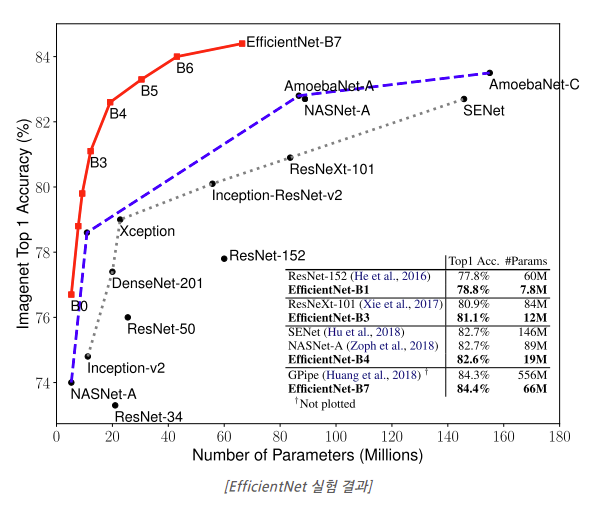

##1. 기존의 모델 성능을 향상시키기 위한 Scaling


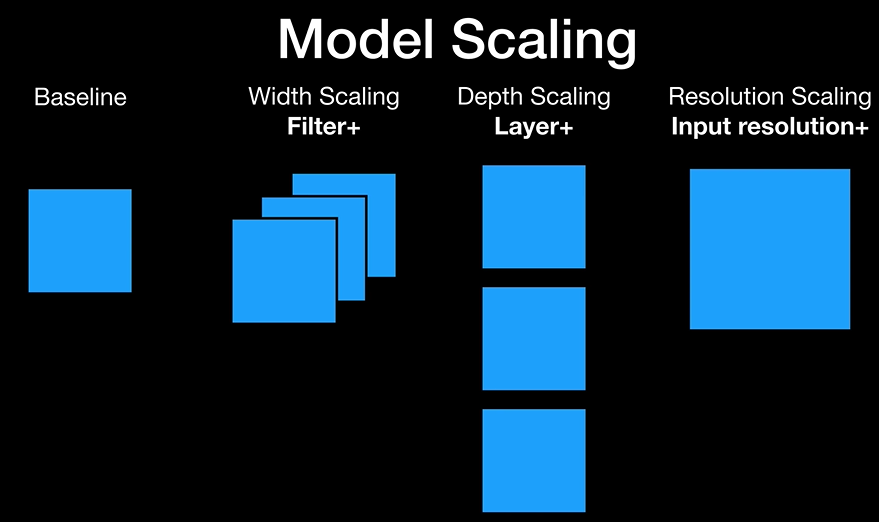

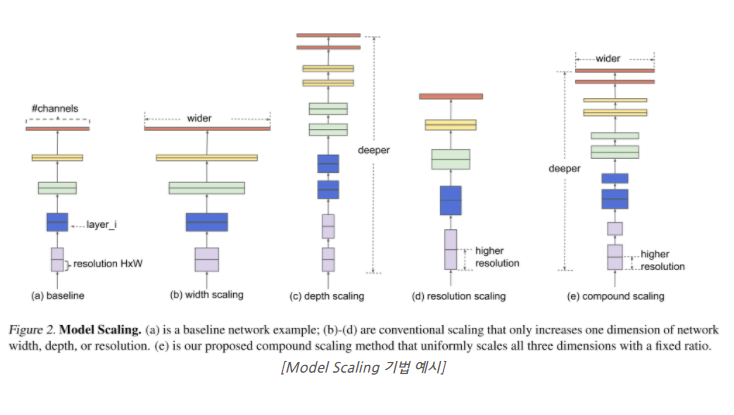

- 이 과정에서 모델을 고정하고, depth와 width, resolution을 모두 조정하는 것이 최선의 방법임을 해당 논문에선 시사하고 있음.
- 이때 첫 번째로 수행되는 과정은 최적의 모델을 선정하는 것이며, 그 이유는 파라미터를 조정하더라도 애초의 모델 성능이 낮다면 해당 모델로 향상될 수 있는 임계점 또한 낮아지기 때문
 - 보통 AutoML과 같은 방식으로 최적의 모델을 선정하며, 이러한 모델을 "EfficientNet-B0"라 지칭
 - 이후 이러한 모델에 대해 세 가지 부분에서 모두 Scaling을 진행하는 "Compound Scaling"을 진행해 개선
 - 이를 통해 적은 수의 파라미터의 FLOPS을 통해서도 기존 모델들 이상의 성능을 보임

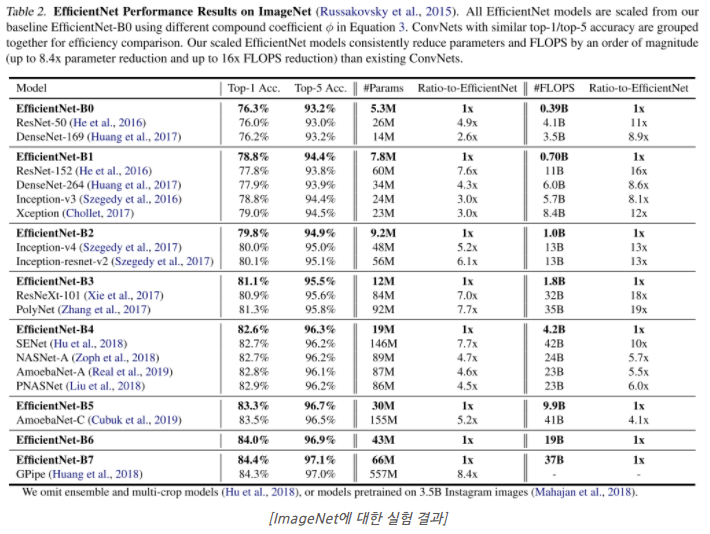

#코드 구현화 및 실습

In [3]:
!pip install -U git+https://github.com/qubvel/efficientnet

  Cloning https://github.com/qubvel/efficientnet to /tmp/pip-req-build-qlrt0cew
  Running command git clone -q https://github.com/qubvel/efficientnet /tmp/pip-req-build-qlrt0cew
  Created wheel for efficientnet: filename=efficientnet-1.1.1-cp36-none-any.whl size=18422 sha256=b7f1b2b991e13ed690c229a69e3be5117bade701f937650763ec9a9c744d00ed
  Stored in directory: /tmp/pip-ephem-wheel-cache-d7nu33ng/wheels/64/60/2e/30ebaa76ed1626e86bfb0cc0579b737fdb7d9ff8cb9522663a
Successfully built efficientnet
  Found existing installation: efficientnet 1.1.1
    Uninstalling efficientnet-1.1.1:
      Successfully uninstalled efficientnet-1.1.1


In [5]:
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt

# decode_predictions : 모델의 예측 결과를 이미지넷 클래스에 맞게 변환
from keras.applications.imagenet_utils import decode_predictions 
from efficientnet.keras import EfficientNetB0, EfficientNetB3
from efficientnet.keras import center_crop_and_resize, preprocess_input

import os

###Download EfficientNet

In [6]:
model = EfficientNetB0(weights='imagenet')

21831680/21826536 [==============================] - 0s 0us/step


###Load Image

In [12]:
!git clone https://github.com/kairess/efficientnet_example.git
%cd efficientnet_example/
!ls -ltr

fatal: destination path 'efficientnet_example' already exists and is not an empty directory.
/content/efficientnet_example
total 3436
-rw-r--r-- 1 root root     125 Feb 21 05:06 README.md
-rw-r--r-- 1 root root 1106816 Feb 21 05:06 EfficientNet-B0.png
-rw-r--r-- 1 root root 2398000 Feb 21 05:06 example.ipynb
drwxr-xr-x 2 root root    4096 Feb 21 05:06 imgs


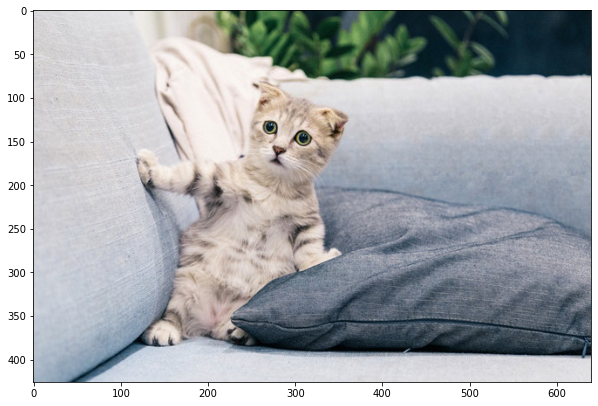

In [13]:
image = imread('imgs/cat.jpg')

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.show()

###Center Crop and Resize

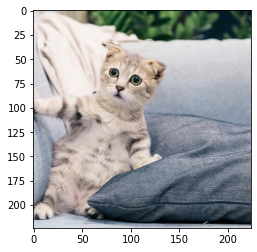

In [14]:
image_size = model.input_shape[1] # 224

# center_crop_and_resize() : 이미지의 가운데 부분만 남기고 크기를 조정하는 함수
x = center_crop_and_resize(image, image_size=image_size)

plt.imshow(x.astype(np.uint8))

###Preprocess Input

In [15]:
x = preprocess_input(x)
x = np.expand_dims(x, 0) # numpy array의 차원을 axis 방향으로 추가

y = model.predict(x)

dy = decode_predictions(y)

print(dy)

40960/35363 [==================================] - 0s 0us/step
[[('n02124075', 'Egyptian_cat', 0.4071737), ('n02123394', 'Persian_cat', 0.17660213), ('n02123045', 'tabby', 0.056813724), ('n02127052', 'lynx', 0.04040272), ('n02123159', 'tiger_cat', 0.025040308)]]


###Define Inference Function

In [16]:
def inference(model, image_path):
    image = imread(image_path)
    
    image_size = model.input_shape[1] # 224
    cx = center_crop_and_resize(image, image_size=image_size)
    
    x = preprocess_input(cx)
    x = np.expand_dims(x, 0)

    y = model.predict(x)
    dy = decode_predictions(y)[0]
    
    for idx, label, confidence in dy:
        print('%s: %.2f%%' % (label, confidence * 100))
    
    plt.figure(figsize=(5, 5))
    plt.imshow(cx.astype(np.uint8))
    plt.show()

###Test

Egyptian_cat: 40.72%
Persian_cat: 17.66%
tabby: 5.68%
lynx: 4.04%
tiger_cat: 2.50%


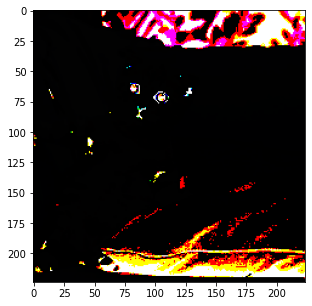

In [25]:
inference(model, 'imgs/cat.jpg')

palace: 49.15%
castle: 16.90%
bell_cote: 13.96%
church: 8.72%
monastery: 2.25%


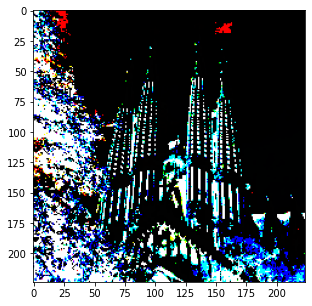

In [24]:
inference(model, 'imgs/01.jpg')

gazelle: 42.19%
impala: 8.24%
ox: 7.94%
llama: 3.77%
hartebeest: 3.72%


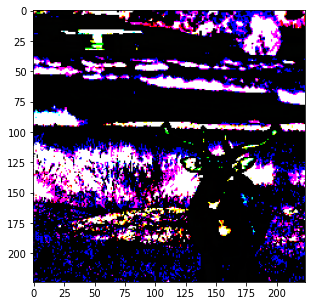

In [18]:
inference(model, 'imgs/02.jpg')

carbonara: 77.81%
plate: 4.93%
broccoli: 1.10%
hen-of-the-woods: 0.41%
soup_bowl: 0.31%


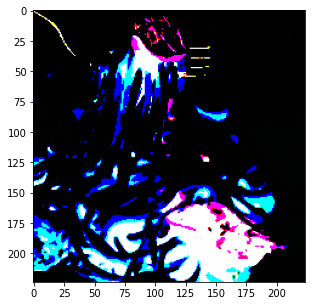

In [19]:
inference(model, 'imgs/03.jpg')

breakwater: 28.88%
maze: 23.09%
patio: 5.75%
seashore: 2.82%
lakeside: 1.72%


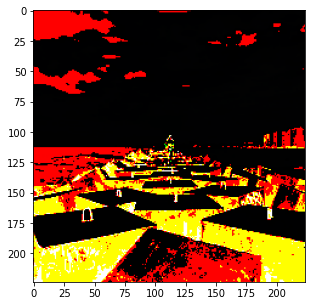

In [28]:
inference(model, 'imgs/05.jpg')

##EfficientNetB3 - 위의 EfficeintNetB0에 compound scaling을 한 모델

In [20]:
model3 = EfficientNetB3(weights='imagenet')

50094080/50086816 [==============================] - 1s 0us/step


Egyptian_cat: 32.77%
tabby: 16.35%
tiger_cat: 5.40%
Persian_cat: 4.86%
lynx: 4.30%


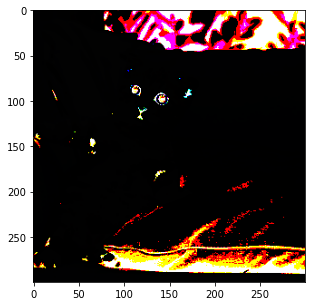

In [26]:
inference(model3, 'imgs/cat.jpg')

palace: 39.35%
bell_cote: 33.56%
castle: 2.33%
crane: 1.44%
church: 1.13%


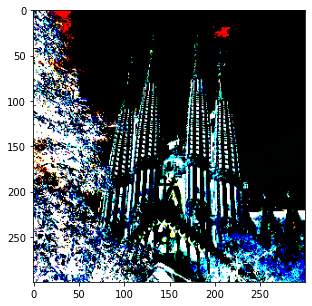

In [27]:
inference(model3, 'imgs/01.jpg')

ox: 28.26%
gazelle: 21.73%
impala: 8.74%
water_buffalo: 6.95%
oxcart: 2.83%


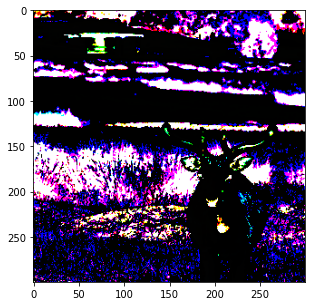

In [22]:
inference(model3, 'imgs/02.jpg')

carbonara: 85.78%
plate: 6.87%
restaurant: 0.44%
meat_loaf: 0.20%
broccoli: 0.20%


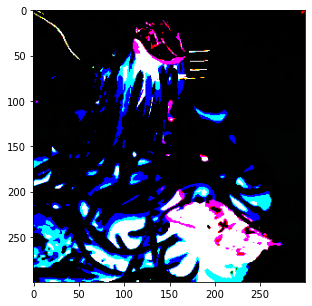

In [23]:
inference(model3, 'imgs/03.jpg')

breakwater: 39.98%
maze: 23.76%
lakeside: 2.56%
promontory: 1.02%
pier: 0.99%


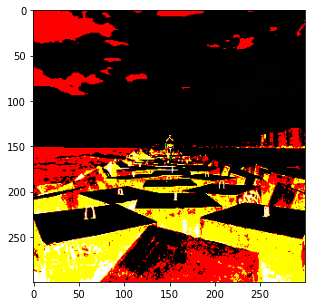

In [30]:
inference(model3, 'imgs/05.jpg')

# 요약 정리 
- 모델의 depth,, width, resolution을 동시에 scaling하는 compound scaling을 통해 적은 파라미터를 사용하는 것만으로 기존 이상의 성능을 보일 수 있다.
- 이를 위해 우선적으로 기본 성능이 좋은 모델들을 찾아야 하며, 이 과정은 일반적으로 AutoML을 이용하며 여기에 compound scaling을 통해 개선해나간다.
- compound scaling을 한 이후에는 규모나 양을 늘려가며 성능을 향상시켜나간다.